In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.metrics import classification_report#这个包是评价报告

In [2]:
data = loadmat('./ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
data['X'].shape, data['y'].shape

((5000, 400), (5000, 1))

In [4]:
np.arange(data['X'].shape[0])

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [5]:
sample_idx = np.random.choice(np.arange(data['X'].shape[0]),100)
sample_images = data['X'][sample_idx,:]
sample_images


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

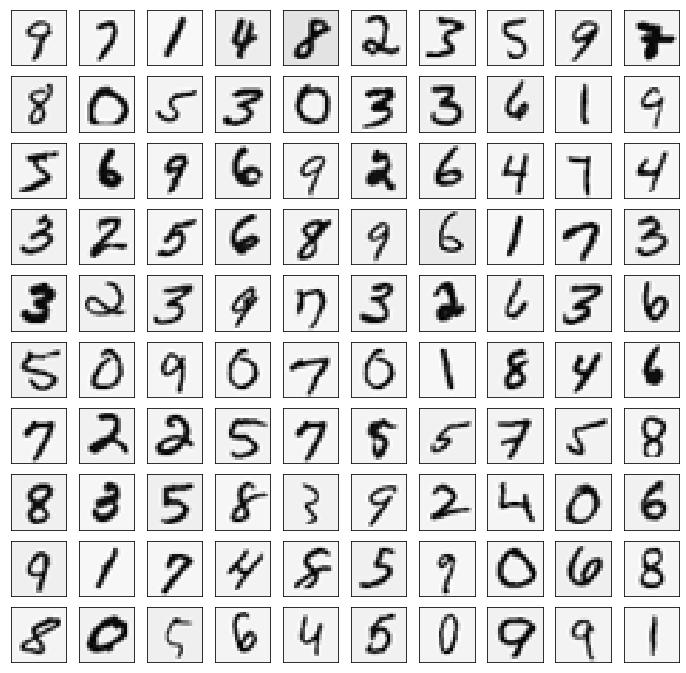

In [6]:
fig,ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(12, 12))
for r in range(10):
    for c in range(10):
        ax_array[r, c].matshow(np.array(sample_images[10 * r + c].reshape((20, 20))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [14]:
def cost(theta,X,y,lamda):
    X=np.matrix(X)
    y=np.matrix(y)
    theta=np.matrix(theta)
    
    J_1=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    J_2=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    
    #正则化项
    reg=lamda/(2*len(X))*np.sum(np.power(theta.ravel()[1:],2))
    
    return  (1/len(X)*np.sum(J_1 - J_2) + reg)
    

In [20]:
def cost(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

In [41]:
def gradient(theta,X,y,lamda):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    
    parameters=int(theta.ravel().shape[1])
    error=sigmoid(X*theta.T)-y
    
    grad=((X.T*error)/len(X)).T + ((lamda/len(X))*theta)
    
    grad[0,0]=np.sum(np.multiply(error, X[:,0])) / len(X)
    
    return np.array(grad).ravel()

In [36]:
def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(X * theta.T) - y
    
    grad = ((X.T * error) / len(X)).T + ((learningRate / len(X)) * theta)
    
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    
    return np.array(grad).ravel()

In [42]:
from scipy.optimize import minimize

def one_vs_all(X,y,num_labels,learningrate):
    rows=X.shape[0]
    params=X.shape[1]
    
    all_theta = np.zeros((num_labels, params + 1))
    
    X=np.insert(X,0,values=np.ones(rows),axis=1)
    
    for i in range(1,num_labels+1):
        theta=np.zeros(params+1)
        #重新构建标签，用0和1表示
        y_i=np.array([1 if label==i else 0 for label in y])
        y_i=np.reshape(y_i,(rows,1))
        
        fmin=minimize(fun=cost,x0=theta,args=(X,y_i,learningrate),method='TNC',jac=gradient)
        all_theta[i-1,:]=fmin.x
        
    return all_theta
        

In [43]:
rows=data['X'].shape[0]
params=data['X'].shape[1]

all_theta=np.zeros((10,params+1))
X = np.insert(data['X'], 0, values=np.ones(rows), axis=1)

theta = np.zeros(params + 1)

y_0 = np.array([1 if label == 0 else 0 for label in data['y']])
y_0 = np.reshape(y_0, (rows, 1))

X.shape, y_0.shape, theta.shape, all_theta.shape

((5000, 401), (5000, 1), (401,), (10, 401))

In [44]:
np.unique(data['y'])#看下有几类标签

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [45]:
all_theta = one_vs_all(data['X'], data['y'], 10, 1)
all_theta

array([[-2.38090200e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30362219e-03, -6.06149084e-10,  0.00000000e+00],
       [-3.18420805e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46211711e-03, -5.08723221e-04,  0.00000000e+00],
       [-4.79563739e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86475853e-05, -2.47347362e-07,  0.00000000e+00],
       ...,
       [-7.98603898e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94272873e-05,  7.21573274e-06,  0.00000000e+00],
       [-4.57361264e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33685653e-03,  1.00046175e-04,  0.00000000e+00],
       [-5.40406502e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16595999e-04,  7.89322344e-06,  0.00000000e+00]])